- An implementation of an Ising spin-glass of size NxN
- With fixed boundary conditions using Metropolis-Hastings
- Connectivity is initialized as a Gaussian distribution N(0, s^2/N)
- Updates occur at randomly selected sites

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Define proposal step
def proposal(s_array):
    _N = s_array.shape[0]
    return np.random.choice(_N, 2)

# Define energy difference adter flipping one randomly chosen site   
def energy_change(spin_site, s_array, up_array, down_array, left_array, right_array):
    i = spin_site[0]
    j = spin_site[1]
    
    if i == 0:
        up_nbr = 0
        down_nbr = s_array[i+1,j]
    elif i == N-1:
        up_nbr = s_array[i-1,j]
        down_nbr = 0
    else:
        up_nbr = s_array[i-1,j]
        down_nbr = s_array[i+1,j]
    if j == 0:
        left_nbr = 0
        right_nbr = s_array[i,j+1]
    elif j == N-1:
        left_nbr = s_array[i,j-1]
        right_nbr = 0
    else:
        left_nbr = s_array[i,j-1]
        right_nbr = s_array[i,j+1]

    up_mult = up_array[i,j] * up_nbr
    down_mult = down_array[i,j] * down_nbr
    left_mult = left_array[i,j] * left_nbr
    right_mult = right_array[i,j] * right_nbr
    
    dE_tmp = 2 * s_array[i,j] * (up_mult + down_mult + left_mult + right_mult)
    return dE_tmp

# Define acceptance probability
def acceptance(bt, energy):
    if energy <= 0:
        return -1
    else:
        prob = -bt*energy
        if prob > np.log(np.random.random()):
            return -1
        else:
            return 1

# Define update step
dE = 0
dM = 0

def update(bt, s_array, up_array, down_array, left_array, right_array):
    global dE
    global dM
    
    # Proposal Step
    site = proposal(s_array)
    
    # Calculate energy and magnetism change
    dE = energy_change(site, s_array, up_array, down_array, left_array, right_array)
    dM = -2 * s_array[site[0],site[1]]
    
    # Acceptance step
    accept = acceptance(bt, dE)
    
    if accept == -1:
        s_array[site[0], site[1]] *= -1
    else:
        dE = 0
        dM = 0
    
    return s_array

In [9]:
def _main_loop(ts, s_array, up_array, down_array, left_array, right_array):
    s_temp = s_array.copy()
    for i in range(ts):
        update_step = update(beta, s_temp, up_array, down_array, left_array, right_array)
        s_temp = update_step
        energy[i+1] = energy[i] + dE
        mag[i+1] = mag[i] + dM

In [10]:
def _main_loop_SA(ts, bt_initial, s_array, up_array, down_array, left_array, right_array):
    s_temp = s_array.copy()
    bt_live = bt_initial
    for i in range(ts):
        if i % 50 == 0:
            bt_live /= 0.9
        update_step = update(bt_live, s_temp, up_array, down_array, left_array, right_array)
        s_temp = update_step
        energy[i+1] = energy[i] + dE
        mag[i+1] = mag[i] + dM

In [11]:
# Set size of model N and initial spins
np.random.seed(1234)
N = 25
spins = np.random.choice([-1.0, 1.0], (N,N))

# Initialize interaction arrays: there are four arrays - up, down, left, right neighbours of a site
up, down, left, right = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N))

# Use J = 1 so graphs are easier to generate
up[1:N, :] = 1
down[0:N-1, :] = up[1:N, :]
left[:, 1:N] = 1
right[:, 0:N-1] = left[:, 1:N]

-1002.0


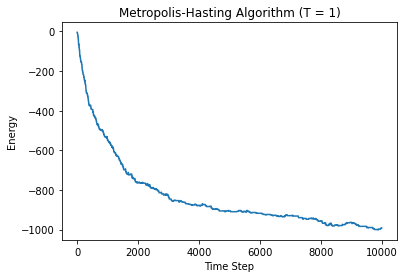

In [12]:
#### Run Main Loop

# Fix number of timesteps and some containers
timesteps = 10000
mag = np.zeros(timesteps+1)
energy = np.zeros(timesteps+1)

# Fix beta (inverse temerature) - from analysis we know that system in glassy-phase for T<s so beta>1/s. 
# Performance of random updates isn't good so don't select temperature too low
Tc = 2/(np.log(1 + np.sqrt(2)))
beta = 1

_main_loop(timesteps, spins, up, down, left, right)
print(energy.min())
# plot magnetism and energy evolving in time
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(energy[1:])
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Metropolis-Hasting Algorithm (T = 1)')
plt.show()

In [13]:
energy[-20:]

array([-994., -994., -994., -994., -994., -994., -992., -992., -992.,
       -992., -992., -992., -992., -992., -992., -992., -992., -992.,
       -992., -992.])

## End

-1066.0


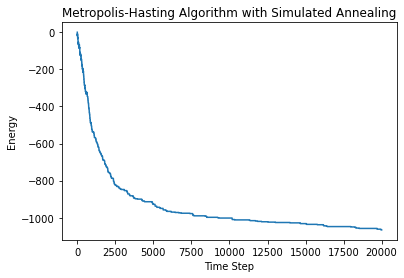

In [14]:
#### Run Main Loop

# Fix beta (inverse temerature) - from analysis we know that system in glassy-phase for T<s so beta>1/s. 
# Performance of random updates isn't good so don't select temperature too low
Tc = 2/(np.log(1 + np.sqrt(2)))
beta = 1/5

# Fix number of timesteps and some containers
timesteps = 20000
mag = np.zeros(timesteps+1)
energy = np.zeros(timesteps+1)

_main_loop_SA(timesteps, beta, spins, up, down, left, right)
print(energy.min())
# plot energy evolving in time
plt.plot(energy[1:])
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.title('Metropolis-Hasting Algorithm with Simulated Annealing')
plt.show()

In [15]:
energy[-20:]

array([-1066., -1066., -1066., -1066., -1066., -1066., -1066., -1066.,
       -1066., -1066., -1066., -1066., -1066., -1066., -1066., -1066.,
       -1066., -1066., -1066., -1066.])

## End

In [ ]:
# Initialize random interaction arrays: up, down, left right
# These represent the interaction strengths to the up/down/left/right neighbours of a site
# There is a symmetry between these matrices
s_h = 1
s_v = 1
up = np.zeros((N,N))
down = np.zeros((N,N))
left = np.zeros((N,N))
right = np.zeros((N,N))

up[1:N,:] = np.random.rand(N-1,N) * s_v
down[0:N-1,:] = up[1:N,:]
left[:,1:N] = np.random.rand(N,N-1) * s_h
right[:,0:N-1] = left[:,1:N]